# Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
%matplotlib inline

In [3]:
# Import ".geojson" file for germany 

country_geo  = r'C:\Users\s.wienecke\Documents\Fortbildung\Letztes Modul\02 Data\Original Data\bundeslaender_simplify200.geojson'

In [4]:
# look at the GEOJSON file contents:

f = open(r'C:\Users\s.wienecke\Documents\Fortbildung\Letztes Modul\02 Data\Original Data\bundeslaender_simplify200.geojson',)
  
# returns GEOJSON object asa dictionary
data = json.load(f)
  
# Iterating through the geojson list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'ADE': 2, 'GF': 4, 'BSG': 1, 'RS': '01', 'AGS': '01', 'SDV_RS': '010020000000', 'GEN': 'Schleswig-Holstein', 'BEZ': 'Land', 'IBZ': 20, 'BEM': '--', 'NBD': 'ja', 'SN_L': '01', 'SN_R': '0', 'SN_K': '00', 'SN_V1': '00', 'SN_V2': '00', 'SN_G': '000', 'FK_S3': '0', 'NUTS': 'DEF', 'RS_0': '010000000000', 'AGS_0': '01000000', 'WSK': '2012/02/01', 'DEBKG_ID': 'DEBKGDL200000029', 'destatis': {'population': 2896712, 'population_m': 1419457, 'population_w': 1477255}}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[8.449214639930998, 55.04957854494075], [8.464195699548982, 55.04571479346361], [8.448226120064305, 55.04235064324516], [8.43244206624993, 55.04892415149459], [8.396235406401235, 55.046154655669746], [8.40053982450238, 55.034813932399146], [8.426277442016268, 55.03280689163812], [8.427165144736355, 55.03701089769506], [8.436703587214886, 55.03940879956509], [8.427298179116875, 55.030890659490005], [8.431298341328455, 55.025358842860925], [8.430

In [5]:
path = r'C:\Users\s.wienecke\Documents\Fortbildung\Letztes Modul'

In [6]:
# Import data immo_data_clean_6.2

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'immo_data_clean_6.2.csv'), index_col = False)

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df.head()

,Unnamed: 0,Unnamed: 0.1,state,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,typeOfFlat,postcode,noRooms,floor,noRoomsRange,garden,livingSpaceRange,city/county,city district,date,Picture category
0,0,0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,1965.0,96107057,oil,False,True,2.0,595.0,86.00,False,4,ground_floor,44269,4.0,1.000000,4,True,4,Dortmund,Schüren,May19,Least pictures
1,1,1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,901.331522,1871.0,111378734,gas,False,False,1.0,800.0,89.00,False,5,ground_floor,67459,3.0,2.122405,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,May19,Least pictures
2,2,2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,2019.0,113147523,NaN,False,True,9.0,965.0,83.80,True,6,apartment,1097,3.0,3.000000,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Oct19,Least pictures
3,3,3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,901.331522,1964.0,108890903,district_heating,False,False,2.0,343.0,58.15,False,2,other,9599,3.0,3.000000,3,False,2,Mittelsachsen_Kreis,Freiberg,May19,Least pictures
4,4,4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,28.804928,903.000000,1950.0,114751222,gas,False,False,1.0,765.0,84.97,False,5,apartment,28213,3.0,1.000000,3,False,4,Bremen,Neu_Schwachhausen,Feb20,Few pictures


In [9]:
df.shape

(268850, 33)

In [10]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'state', 'serviceCharge', 'heatingType',
       'telekomTvOffer', 'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'cellar', 'yearConstructedRange',
       'baseRent', 'livingSpace', 'lift', 'baseRentRange', 'typeOfFlat',
       'postcode', 'noRooms', 'floor', 'noRoomsRange', 'garden',
       'livingSpaceRange', 'city/county', 'city district', 'date',
       'Picture category'],
      dtype='object')

# Data wrangling 

## Fix dummy columns

In [11]:
# Create a subset with state values as fix dummy columns (for training)

state_rec = pd.get_dummies(df, columns=['state'],prefix="",prefix_sep="")

In [12]:
state_rec.head()

,Unnamed: 0,Unnamed: 0.1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,typeOfFlat,postcode,noRooms,floor,noRoomsRange,garden,livingSpaceRange,city/county,city district,date,Picture category,Baden_Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg_Vorpommern,Niedersachsen,Nordrhein_Westfalen,Rheinland_Pfalz,Saarland,Sachsen,Sachsen_Anhalt,Schleswig_Holstein,Thüringen
0,0,0,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,1965.0,96107057,oil,False,True,2.0,595.0,86.00,False,4,ground_floor,44269,4.0,1.000000,4,True,4,Dortmund,Schüren,May19,Least pictures,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,901.331522,1871.0,111378734,gas,False,False,1.0,800.0,89.00,False,5,ground_floor,67459,3.0,2.122405,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,May19,Least pictures,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,2,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,2019.0,113147523,NaN,False,True,9.0,965.0,83.80,True,6,apartment,1097,3.0,3.000000,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Oct19,Least pictures,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3,3,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,901.331522,1964.0,108890903,district_heating,False,False,2.0,343.0,58.15,False,2,other,9599,3.0,3.000000,3,False,2,Mittelsachsen_Kreis,Freiberg,May19,Least pictures,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,4,138.00,self_contained_central_heating,NaN,False,True,19,2.46,28.804928,903.000000,1950.0,114751222,gas,False,False,1.0,765.0,84.97,False,5,apartment,28213,3.0,1.000000,3,False,4,Bremen,Neu_Schwachhausen,Feb20,Few pictures,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# Select only the states from state_rec in a new subset

states_num = state_rec[["Sachsen",
           "Rheinland_Pfalz",
           "Nordrhein_Westfalen",
           "Bremen",
           "Bayern",
           "Hessen",
           "Hamburg",
           "Berlin",
           "Mecklenburg_Vorpommern",
           "Niedersachsen",
           "Brandenburg",
           "Baden_Württemberg",
           "Sachsen_Anhalt",
           "Thüringen",
           "Schleswig_Holstein",
           "Saarland"]]

In [14]:
#  turning the dummy data from the states columns into a categorical variable in s2
s2 = states_num.idxmax(axis=1)


In [15]:
s2

0         Nordrhein_Westfalen
1             Rheinland_Pfalz
2                     Sachsen
3                     Sachsen
4                      Bremen
                 ...         
268845                 Bayern
268846                 Hessen
268847                 Hessen
268848    Nordrhein_Westfalen
268849                 Hessen
Length: 268850, dtype: object

In [16]:
type(s2)

pandas.core.series.Series

In [17]:
# Create new column 'state' in the state_rec dataframe
state_rec['STATE_NAME'] = s2

In [18]:
state_rec.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'serviceCharge', 'heatingType',
       'telekomTvOffer', 'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'cellar', 'yearConstructedRange',
       'baseRent', 'livingSpace', 'lift', 'baseRentRange', 'typeOfFlat',
       'postcode', 'noRooms', 'floor', 'noRoomsRange', 'garden',
       'livingSpaceRange', 'city/county', 'city district', 'date',
       'Picture category', 'Baden_Württemberg', 'Bayern', 'Berlin',
       'Brandenburg', 'Bremen', 'Hamburg', 'Hessen', 'Mecklenburg_Vorpommern',
       'Niedersachsen', 'Nordrhein_Westfalen', 'Rheinland_Pfalz', 'Saarland',
       'Sachsen', 'Sachsen_Anhalt', 'Schleswig_Holstein', 'Thüringen',
       'STATE_NAME'],
      dtype='object')

In [19]:
# Drop the dummy columns from the dataframe
state_rec.drop(columns = ["Sachsen",
           "Rheinland_Pfalz",
           "Nordrhein_Westfalen",
           "Bremen",
           "Bayern",
           "Hessen",
           "Hamburg",
           "Berlin",
           "Mecklenburg_Vorpommern",
           "Niedersachsen",
           "Brandenburg",
           "Baden_Württemberg",
           "Sachsen_Anhalt",
           "Thüringen",
           "Schleswig_Holstein",
           "Saarland"], inplace = True)

In [20]:
state_rec.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'serviceCharge', 'heatingType',
       'telekomTvOffer', 'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'cellar', 'yearConstructedRange',
       'baseRent', 'livingSpace', 'lift', 'baseRentRange', 'typeOfFlat',
       'postcode', 'noRooms', 'floor', 'noRoomsRange', 'garden',
       'livingSpaceRange', 'city/county', 'city district', 'date',
       'Picture category', 'STATE_NAME'],
      dtype='object')

In [21]:
state_rec.head()

,Unnamed: 0,Unnamed: 0.1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,typeOfFlat,postcode,noRooms,floor,noRoomsRange,garden,livingSpaceRange,city/county,city district,date,Picture category,STATE_NAME
0,0,0,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,1965.0,96107057,oil,False,True,2.0,595.0,86.00,False,4,ground_floor,44269,4.0,1.000000,4,True,4,Dortmund,Schüren,May19,Least pictures,Nordrhein_Westfalen
1,1,1,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,901.331522,1871.0,111378734,gas,False,False,1.0,800.0,89.00,False,5,ground_floor,67459,3.0,2.122405,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,May19,Least pictures,Rheinland_Pfalz
2,2,2,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,2019.0,113147523,NaN,False,True,9.0,965.0,83.80,True,6,apartment,1097,3.0,3.000000,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Oct19,Least pictures,Sachsen
3,3,3,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,901.331522,1964.0,108890903,district_heating,False,False,2.0,343.0,58.15,False,2,other,9599,3.0,3.000000,3,False,2,Mittelsachsen_Kreis,Freiberg,May19,Least pictures,Sachsen
4,4,4,138.00,self_contained_central_heating,NaN,False,True,19,2.46,28.804928,903.000000,1950.0,114751222,gas,False,False,1.0,765.0,84.97,False,5,apartment,28213,3.0,1.000000,3,False,4,Bremen,Neu_Schwachhausen,Feb20,Few pictures,Bremen


In [22]:
type(state_rec)

pandas.core.frame.DataFrame

In [23]:
state_rec.head()

,Unnamed: 0,Unnamed: 0.1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,typeOfFlat,postcode,noRooms,floor,noRoomsRange,garden,livingSpaceRange,city/county,city district,date,Picture category,STATE_NAME
0,0,0,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,1965.0,96107057,oil,False,True,2.0,595.0,86.00,False,4,ground_floor,44269,4.0,1.000000,4,True,4,Dortmund,Schüren,May19,Least pictures,Nordrhein_Westfalen
1,1,1,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,901.331522,1871.0,111378734,gas,False,False,1.0,800.0,89.00,False,5,ground_floor,67459,3.0,2.122405,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,May19,Least pictures,Rheinland_Pfalz
2,2,2,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,2019.0,113147523,NaN,False,True,9.0,965.0,83.80,True,6,apartment,1097,3.0,3.000000,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Oct19,Least pictures,Sachsen
3,3,3,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,901.331522,1964.0,108890903,district_heating,False,False,2.0,343.0,58.15,False,2,other,9599,3.0,3.000000,3,False,2,Mittelsachsen_Kreis,Freiberg,May19,Least pictures,Sachsen
4,4,4,138.00,self_contained_central_heating,NaN,False,True,19,2.46,28.804928,903.000000,1950.0,114751222,gas,False,False,1.0,765.0,84.97,False,5,apartment,28213,3.0,1.000000,3,False,4,Bremen,Neu_Schwachhausen,Feb20,Few pictures,Bremen


# Conduct consistency checks

## Check for missing values

In [24]:
state_rec.isnull().sum()

Unnamed: 0                  0
Unnamed: 0.1                0
serviceCharge               0
heatingType             44856
telekomTvOffer          32619
newlyConst                  0
balcony                     0
picturecount                0
pricetrend                  0
telekomUploadSpeed          0
totalRent                   0
yearConstructed             0
scoutId                     0
firingTypes             56964
hasKitchen                  0
cellar                      0
yearConstructedRange        0
baseRent                    5
livingSpace                 0
lift                        0
baseRentRange               0
typeOfFlat              36614
postcode                    0
noRooms                     0
floor                       0
noRoomsRange                0
garden                      0
livingSpaceRange            0
city/county                 0
city district               0
date                        0
Picture category            0
STATE_NAME                  0
dtype: int

In [25]:
# drop colums for missing values becaus they are categorial
state_rec=state_rec.drop(columns=['heatingType', 'telekomTvOffer', 'firingTypes','typeOfFlat'])

In [26]:
# Last check for NaN
state_rec.isnull().sum()

Unnamed: 0              0
Unnamed: 0.1            0
serviceCharge           0
newlyConst              0
balcony                 0
picturecount            0
pricetrend              0
telekomUploadSpeed      0
totalRent               0
yearConstructed         0
scoutId                 0
hasKitchen              0
cellar                  0
yearConstructedRange    0
baseRent                5
livingSpace             0
lift                    0
baseRentRange           0
postcode                0
noRooms                 0
floor                   0
noRoomsRange            0
garden                  0
livingSpaceRange        0
city/county             0
city district           0
date                    0
Picture category        0
STATE_NAME              0
dtype: int64

## Duplicates check

In [27]:
dups = state_rec.duplicated()

In [28]:
dups.shape # no dups

(268850,)

## Extreme values checks

<AxesSubplot:xlabel='serviceCharge', ylabel='Count'>

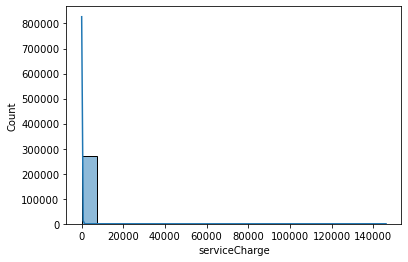

In [29]:
# shows extreme values for 'serviceCharge'
sns.histplot(state_rec['serviceCharge'], bins=20, kde = True) 

In [30]:
# Check how many extreme values

state_rec[state_rec['serviceCharge'] >10000]

,Unnamed: 0,Unnamed: 0.1,serviceCharge,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,postcode,noRooms,floor,noRoomsRange,garden,livingSpaceRange,city/county,city district,date,Picture category,STATE_NAME
25687,25687,25687,146118.0,False,False,6,4.74,28.804928,794.290000,1928.0,110967960,False,True,1.0,648.29,117.87,False,5,44809,3.0,1.0,3,False,5,Bochum,Hamme,May19,Least pictures,Nordrhein_Westfalen
144897,144897,144897,20392.0,False,True,9,5.17,40.000000,530.000000,2013.0,69350676,False,True,8.0,346.08,65.27,True,2,32549,2.0,0.0,2,True,3,Minden_Lübbecke_Kreis,Bad_Oeynhausen,Feb20,Least pictures,Nordrhein_Westfalen
153825,153825,153825,15750.0,True,True,6,1.53,28.804928,732.000000,2018.0,103439517,False,True,9.0,567.00,63.00,True,4,1237,2.0,0.0,2,True,3,Dresden,Reick,Sep18,Least pictures,Sachsen
178325,178325,178325,10038.0,False,False,11,2.48,40.000000,341.280000,1909.0,109786490,False,False,1.0,240.90,40.15,False,1,39576,1.0,1.0,1,False,1,Stendal_Kreis,Stendal,Feb20,Few pictures,Sachsen_Anhalt
243713,243713,243713,25000.0,False,True,12,3.61,40.000000,901.331522,1984.0,111426318,False,True,4.0,NaN,14000.00,False,9,45133,3.5,1.0,3,False,7,Essen,Bredeney,May19,Few pictures,Nordrhein_Westfalen


In [31]:
# Clean extreme values

state_rec = state_rec[state_rec['serviceCharge'] < 10000]

In [32]:
state_rec.shape

(268845, 29)

<AxesSubplot:xlabel='baseRent', ylabel='Count'>

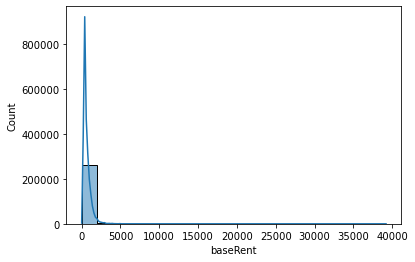

In [33]:
# shows extreme values for 'baseRent'
sns.histplot(state_rec['baseRent'], bins=20, kde = True)

In [34]:
# Check how many extreme values

state_rec[state_rec['baseRent'] >20000]

,Unnamed: 0,Unnamed: 0.1,serviceCharge,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,postcode,noRooms,floor,noRoomsRange,garden,livingSpaceRange,city/county,city district,date,Picture category,STATE_NAME
176647,176647,176647,78.0,False,False,2,4.62,10.0,449.900000,1957.00000,107354082,False,True,2.000000,30990.0,47.67,False,9,28277,3.0,2.0,3,False,2,Bremen,Kattenesch,Sep18,Least pictures,Bremen
181618,181618,181618,165.0,False,False,11,1.41,40.0,901.331522,1966.40059,84621450,False,False,3.714544,39200.0,49.00,True,9,1109,1.0,3.0,1,False,2,Dresden,Klotzsche,May19,Few pictures,Sachsen
213625,213625,213625,140.0,False,True,15,6.49,40.0,2390.000000,1892.00000,107309166,False,True,1.000000,20100.0,110.00,False,9,80538,3.0,3.0,3,False,5,München,Lehel,Sep18,Few pictures,Bayern


In [35]:
# Clean extreme values

state_rec = state_rec[state_rec['baseRent'] <20000]

In [36]:
state_rec.shape

(268837, 29)

<AxesSubplot:xlabel='livingSpace', ylabel='Count'>

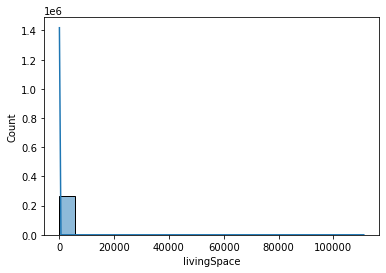

In [37]:
# shows extreme values for 'serviceCharge'
sns.histplot(state_rec['livingSpace'], bins=20, kde = True)

In [38]:
# Check how many extreme values

state_rec[state_rec['livingSpace'] >1000]

,Unnamed: 0,Unnamed: 0.1,serviceCharge,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,postcode,noRooms,floor,noRoomsRange,garden,livingSpaceRange,city/county,city district,date,Picture category,STATE_NAME
50683,50683,50683,151.206113,False,True,11,0.72,2.400000,901.331522,1911.00000,114935600,False,True,1.000000,0.00,1717.74,True,1,9112,5.0,2.122405,5,False,7,Chemnitz,Kaßberg,Feb20,Few pictures,Sachsen
51540,51540,51540,146.000000,False,False,8,4.33,2.400000,650.000000,1996.00000,109860941,True,True,5.000000,504.00,8684.00,False,4,16225,3.0,4.000000,3,True,7,Barnim_Kreis,Eberswalde,Oct19,Least pictures,Brandenburg
92451,92451,92451,111.000000,True,False,30,3.58,2.400000,901.331522,2019.00000,110383735,False,False,9.000000,800.00,2257.88,False,5,90518,75.5,2.122405,5,False,7,Nürnberger_Land_Kreis,Altdorf_bei_Nürnberg,May19,A lot of pictures,Bayern
151184,151184,151184,115.000000,False,False,23,6.09,40.000000,1400.000000,1987.00000,109350573,False,True,4.000000,1200.00,66100.00,False,7,81737,2.0,2.000000,2,True,7,München,Perlach,May19,A lot of pictures,Bayern
172399,172399,172399,60.000000,False,False,5,1.24,2.400000,260.000000,1966.40059,111349875,False,True,3.714544,200.00,4340.00,False,1,8529,2.0,1.000000,2,False,7,Plauen,Reusa_mit_Sorga,May19,Least pictures,Sachsen
175397,175397,175397,151.206113,False,False,0,4.61,28.804928,369.000000,1966.40059,113363197,False,False,3.714544,679.00,111111.00,False,5,39624,3.0,2.122405,3,False,7,Altmarkkreis_Salzwedel,Güssefeld,Oct19,Least pictures,Sachsen_Anhalt
202205,202205,202205,107.000000,False,True,11,3.29,40.000000,901.331522,1964.00000,112281127,True,False,2.000000,519.00,7008.00,False,4,33104,3.0,2.000000,3,False,7,Paderborn_Kreis,Paderborn,Oct19,Few pictures,Nordrhein_Westfalen
215900,215900,215900,60.000000,False,False,9,1.44,2.400000,901.331522,1923.00000,111330060,False,True,1.000000,245.00,2782.00,False,1,2782,3.0,0.000000,3,True,7,Görlitz_Kreis,Seifhennersdorf,May19,Least pictures,Sachsen
222457,222457,222457,99.350000,False,True,3,5.97,40.000000,901.331522,1974.00000,113860387,True,True,3.000000,283.14,2420.00,True,1,48159,1.0,7.000000,1,False,7,Münster,Kinderhaus_West,Oct19,Least pictures,Nordrhein_Westfalen
223187,223187,223187,128.250000,False,True,11,6.17,2.400000,1641.500000,2016.00000,109754861,True,True,9.000000,1385.00,10259.00,True,7,60435,3.0,1.000000,3,True,7,Frankfurt_am_Main,Preungesheim,May19,Few pictures,Hessen


In [39]:
# Clean extreme values

state_rec = state_rec[state_rec['livingSpace'] <1000]

In [40]:
state_rec.shape

(268825, 29)

<AxesSubplot:xlabel='noRoomsRange', ylabel='Count'>

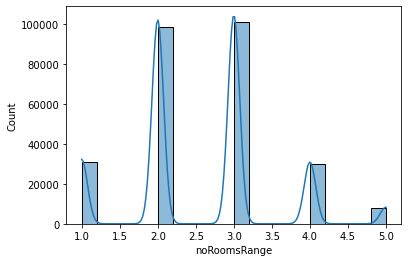

In [41]:
# shows extreme values for 'noRoomsRange'
sns.histplot(state_rec['noRoomsRange'], bins=20, kde = True)

no cleaning necessary

In [42]:
state_rec.dtypes

Unnamed: 0                int64
Unnamed: 0.1              int64
serviceCharge           float64
newlyConst                 bool
balcony                    bool
picturecount              int64
pricetrend              float64
telekomUploadSpeed      float64
totalRent               float64
yearConstructed         float64
scoutId                   int64
hasKitchen                 bool
cellar                     bool
yearConstructedRange    float64
baseRent                float64
livingSpace             float64
lift                       bool
baseRentRange             int64
postcode                  int64
noRooms                 float64
floor                   float64
noRoomsRange              int64
garden                     bool
livingSpaceRange          int64
city/county              object
city district            object
date                     object
Picture category         object
STATE_NAME               object
dtype: object

# 4. Plotting a choropleth

In [43]:
# Create a data frame with just the states and the values for baseReht we want plotted

data_to_plot = state_rec[['STATE_NAME','baseRent']]
data_to_plot.head()

,STATE_NAME,baseRent
0,Nordrhein_Westfalen,595.0
1,Rheinland_Pfalz,800.0
2,Sachsen,965.0
3,Sachsen,343.0
4,Bremen,765.0


In [44]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and geojson geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['STATE_NAME', 'baseRent'],
    key_on = 'feature.properties.GEN',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [45]:
map.save('plot_data.html')

# Discussing the results

## Answer of existing research questions

Where can people live most cheaply/ expensive?

The cheapest flats are in Saxony and Brandenburg. 
The most expensive flats are in Baden Würtemberg, Rhineland-Palatinate, Thuringia, Saxony-Anhalt, Mecklenburg-Western Pomerania, North Rhine-Westphalia and Schleswig-Holstein.

## New research questions

No there are no new research questions.